# Exploratory Task 3


In this task, we are initially checking for missing/null values in the US-All datasets and the X dataset. 

There is a date format difference between US-All datasets and our X (Homelessness) dataset. 
Our X dataset had the format mm/dd/yyyy whereas the US-All dataset has yyyy-mm-dd. We have converted X dataset format to yyyy-mm-dd.


In [374]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [375]:
us_confirmed = pd.read_csv("US-all/US_confirmed.csv")
us_deaths = pd.read_csv("US-all/US_deaths.csv")
homeless = pd.read_csv("US-all/DHS_Daily_Report.csv")

In [376]:
print(us_confirmed.isnull().values.any())
print(us_deaths.isnull().values.any())
print(homeless.isnull().values.any())

False
False
False


In [377]:
homeless['Date of Census'] = pd.to_datetime(homeless['Date of Census'])

In [378]:
homeless.sort_values(by=['Date of Census'], inplace=True, ascending=False)

In [379]:
homeless.head()

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
2792,2021-05-10,33430,15504,48934,13565,4361,17926,8920,11728,15504,27232,1795,3776
2791,2021-05-09,33565,15619,49184,13614,4346,17960,8981,11814,15619,27433,1802,3791
2790,2021-05-08,33466,15630,49096,13479,4360,17839,8994,11833,15630,27463,1804,3794
2789,2021-05-07,33511,15606,49117,13490,4377,17867,8999,11844,15606,27450,1807,3800
2788,2021-05-06,33560,15587,49147,13551,4389,17940,8985,11828,15587,27415,1803,3792


In [380]:
us_confirmed.head()

,State,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-03
0,AK,0,0,0,0,0,0,0,0,0,...,59448,59627,59627,59627,59627,60248,60248,60628,60823,60823
1,AL,0,0,0,0,0,0,0,0,0,...,513161,513605,514098,514415,514642,515015,515423,515893,516309,516662
2,AR,0,0,0,0,0,0,0,0,0,...,329515,329700,329865,329934,330013,330188,330401,330611,330756,330972
3,AZ,0,0,0,0,1,1,1,1,1,...,838016,838719,839892,840492,840614,841192,841884,842273,843174,844328
4,CA,0,0,0,0,2,3,3,4,4,...,3563340,3564383,3564476,3564476,3564476,3564476,3564476,3570718,3573028,3577951


In [381]:
us_deaths_transposed = us_deaths.T
new_header = us_deaths_transposed.iloc[0] #grab the first row for the header
us_deaths_transposed= us_deaths_transposed[1:] #take the data less the header row
us_deaths_transposed.columns = new_header #set the header row as the df header
us_deaths_transposed['total_death'] = us_deaths_transposed.sum(axis =1)
date = us_deaths_transposed.index
us_deaths_transposed['date'] = date
us_deaths_transposed = us_deaths_transposed.set_index('date').diff()
us_deaths_transposed = us_deaths_transposed.reset_index()

In [382]:
us_deaths_transposed.head()

State,date,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,total_death
0,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [383]:
us_confirmed_transposed = us_confirmed.T
new_header = us_confirmed_transposed.iloc[0] #grab the first row for the header
us_confirmed_transposed= us_confirmed_transposed[1:] #take the data less the header row
us_confirmed_transposed.columns = new_header #set the header row as the df header
us_confirmed_transposed['total_cases'] = us_confirmed_transposed.sum(axis =1)
date = us_confirmed_transposed.index
us_confirmed_transposed['date'] = date
us_confirmed_transposed = us_confirmed_transposed.set_index('date').diff()
us_confirmed_transposed = us_confirmed_transposed.reset_index()

In [384]:
us_confirmed_transposed.head()

State,date,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,total_cases
0,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,2020-01-26,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0


# Exploratory Inference 1: Using Person Correlation Coefficient

 
If we observe the below refernce , "March 11" — WHO Declares COVID-19 as the Pandemic.Covid cases have drastically raised all around the world in March 2020 (https://www.ajmc.com/view/a-timeline-of-covid19-developments-in-2020)
Hence, We have decided to consider the data set for MArch 2020 and analyse the impact of Covid on Homeless Shelter

In this, We are calculating the PEARSON CORRELATION COEFFICIENT for  CONFIRMED CASES v/s TOTAL INVIDUALS IN HOMELESS SHELTER in the Month of March,'20




In [385]:
def person_correlation_coefficient(x, y):
    cov_matrix = np.cov(x,y)
    r = cov_matrix[0][1]/np.sqrt((cov_matrix[0][0]*cov_matrix[1][1]))
    print("Pearson Correlation Coefficient Value is: " + "{:5.2f}".format(r))
    return r

In [386]:
us_confirmed_march = us_confirmed_transposed[((us_confirmed_transposed['date'] >= '2020-03-01'))][:30]
homeless_march = homeless[((homeless['Date of Census'].dt.strftime('%Y-%m-%d') >= '2020-03-01'))][-30:]

In [387]:
homeless_march.rename(columns={'Date of Census': 'date'}, inplace=True)
homeless_march.date = homeless_march.date.astype(str)
us_confirmed_march.date = us_confirmed_march.date.astype(str)
df = pd.merge(us_confirmed_march, homeless_march, on=['date'])

In [388]:
person_correlation_coefficient(np.array(us_confirmed_march['total_cases']), np.array(homeless_march['Total Individuals in Shelter']))

Pearson Correlation Coefficient Value is:  0.87


0.8667049105387643

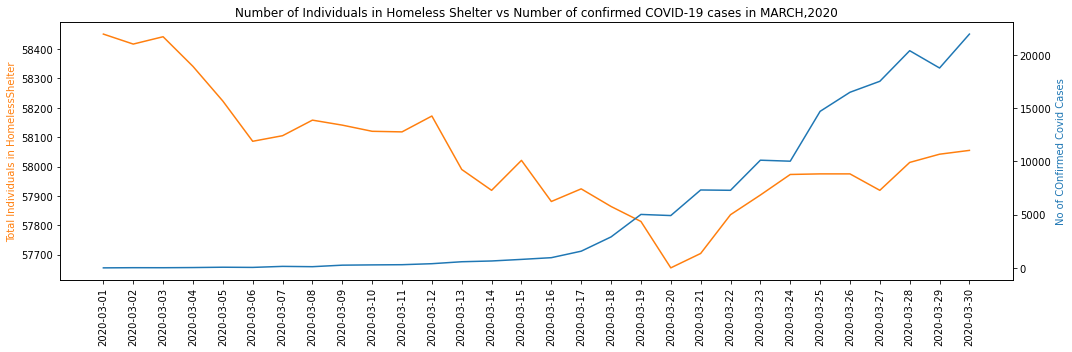

In [389]:
fig, ax1 = plt.subplots(figsize = (15,5))
ax1.plot(df['date'],df['Total Individuals in Shelter'], color = 'tab:orange')
ax1.set_xticks(df.date)
ax1.set_xticklabels(ax1.get_xticks(),rotation=90)
ax1.set_ylabel('Total Individuals in HomelessShelter',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(df['date'],df['total_cases'],color = 'tab:blue')
ax2.set_ylabel('No of COnfirmed Covid Cases',color = 'tab:blue')
plt.title('Number of Individuals in Homeless Shelter vs Number of confirmed COVID-19 cases in MARCH,2020')
fig.tight_layout()
plt.show()

# OBSERVATION :

**The below is the analysis for Number of individuals in Homeless Shelter vs Number of confirmed COVID-19 cases (in MARCH'20)**

Pearson Correlation Coefficient Value is:  0.87

This value shows a strong postive correlation between Number of individuals in Homeless Shelter and Number of confirmed COVID-19 cases.This implies that Covid pandemic has an impact on people's lives.Lot of individuals have lost their job and income due to the ongoing pandemic.Due to loss of income and quality of life, many people have gone homless. 
Hence we can infer that as the impact of COvid increases(/cases increased) ,total Individuals in Homeless Shelter increases.
